PyTroch introduction
https://colab.research.google.com/drive/1Xed5YSpLsLfkn66OhhyNzr05VE89enng#scrollTo=IxP-tvHcMTio

```
# This is formatted as code
```



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np

torch.manual_seed(446)
np.random.seed(446)

In [2]:
x_numpy = np.array([0.1, 0.2, 0.3])
x_torch = torch.tensor([0.1, 0.2, 0.3])
print('x_numpy, x_torch')
print(x_numpy, x_torch)
print()

print('to and from numpy to pytorch')
print(torch.from_numpy(x_numpy), x_torch.numpy())
print()

y_numpy = np.array([3, 4, 5])
y_torch = torch.tensor([3, 4, 5])
print('x+y')
print(x_numpy+ y_numpy, x_torch+ y_torch)
print()

print('norm')
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print()

print('mean along the 0 dimension')
x_numpy = np.array([[1, 2], [3, 4.]])
x_torch = torch.tensor([[1, 2], [3, 4.]])
print(x_numpy, x_torch)
print(np.mean(x_numpy, axis= 0), torch.mean(x_torch, dim= 0))
print(np.mean(x_numpy, axis= 1), torch.mean(x_torch, dim= 1))
print()

x_numpy, x_torch
[0.1 0.2 0.3] tensor([0.1000, 0.2000, 0.3000])

to and from numpy to pytorch
tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64) [0.1 0.2 0.3]

x+y
[3.1 4.2 5.3] tensor([3.1000, 4.2000, 5.3000])

norm
0.37416573867739417 tensor(0.3742)

mean along the 0 dimension
[[1. 2.]
 [3. 4.]] tensor([[1., 2.],
        [3., 4.]])
[2. 3.] tensor([2., 3.])
[1.5 3.5] tensor([1.5000, 3.5000])



In [3]:
N, C, W, H = 10000, 3, 28, 28
x = torch.randn((N, C, W, H))

print(x.shape)
print(x.view(N, C, 784).shape)
print(x.view(-1, C, 784).shape) # it cna automatically calculate the correct dimension if -1 is passed in, but one tensor only allowed one -1 exist


torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])
torch.Size([10000, 3, 784])


In [4]:
x = torch.empty(5, 1, 4, 1)
y = torch.empty(   3, 1, 1)
print((x+y).size())
# broadcasting 允許tensor自動去補到最兩個之中最大的size,但每個dimesion中其中一個要為1

torch.Size([5, 3, 4, 1])


In [5]:
a = torch.tensor(2.0, requires_grad= True)
b = torch.tensor(1.0, requires_grad= True)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)


c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)


In [7]:
cpu = torch.device('cpu')
gpu = torch.device('cuda')

x = torch.rand(10)
print(x)
x = x.to(gpu)
print(x)
x = x.to(cpu)
print(x)

tensor([0.6028, 0.4290, 0.8083, 0.6786, 0.3323, 0.2304, 0.0098, 0.3594, 0.4761,
        0.8707])
tensor([0.6028, 0.4290, 0.8083, 0.6786, 0.3323, 0.2304, 0.0098, 0.3594, 0.4761,
        0.8707], device='cuda:0')
tensor([0.6028, 0.4290, 0.8083, 0.6786, 0.3323, 0.2304, 0.0098, 0.3594, 0.4761,
        0.8707])


In [11]:
def f(x):
  return (x-2)**2

def fp(x):
  return 2*(x-2)

x = torch.tensor([1.0], requires_grad= True)

y = f(x)
y.backward()

print('Ayalytical f\'(x):', fp(x))
print('PyTorch\'s f\'(x):', x.grad)

Ayalytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-2.])


In [13]:
def g(w):
  return 2*w[0]*w[1] + w[1]*torch.cos(w[0])
  
def grad_g(w):
  return torch.tensor([2*w[1] - w[1]* torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad= True)

z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print("PyTorch\'s grad g(w)", w.grad)

Analytical grad g(w) tensor([2.0000, 5.2832])
PyTorch's grad g(w) tensor([2.0000, 5.2832])


In [19]:
x = torch.tensor([5.0], requires_grad= True)
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x) pytorch')
for i in range(15):
  y = f(x)
  y.backward()
  print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))


  x.data = x.data - step_size * x.grad

  x.grad.detach_()
  x.grad.zero_()

iter,	x,	f(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


In [22]:
d = 2
n = 50
X = torch.randn(n, d)
true_w = torch.tensor([[-1.0], [2.0]])
y = X @ true_w + torch.randn(n, 1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)

tensor([[-1.],
        [ 2.]])
X shape torch.Size([50, 2])
y shape torch.Size([50, 1])
w shape torch.Size([2, 1])


In [23]:
def model(X, w):
  return X @ w
def rss(y, y_hat):
  return torch.norm(y- y_hat)**2/ n

def grad_rss(X, y, w):
  return -2*X.t() @ (y- X @ w) / n

w = torch.tensor([[1.], [0]], requires_grad= True)
y_hat = model(X, w)

loss = rss(y, y_hat)
loss.backward()

print('Analytical gradient', grad_rss(X, y, w).detach().view(2).numpy())
print('PyTorch\'s gradient', w.grad.view(2).numpy())


Analytical gradient [ 5.1466136 -4.501194 ]
PyTorch's gradient [ 5.1466146 -4.501193 ]


In [26]:
step_size = 0.1
print('iter,\tloss\tw')
y_hat = model(X, w)
loss = rss(y, y_hat)

loss.backward()

w.data = w.data - step_size * w.grad

print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))

w.grad.detach()
w.grad.zero_()

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss	w
14,	9.61,	[-0.5439844  1.3503579]

true w		 [-1.  2.]
estimated w	 [-0.5439844  1.3503579]


In [31]:
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

#example_tensor = torch.tensor([[1., 2, 3], [4, 5, 6]])
example_tensor = torch.tensor([[1.,2,3], [4,5,6]])
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.view)
print('transormed', transformed.view)
print()
print('we can see that the weights exist in the background\n')
print('w', linear_module.weight)
print('b', linear_module.bias)

example_tensor <built-in method view of Tensor object at 0x7f6f457aa1d0>
transormed <built-in method view of Tensor object at 0x7f6f457aa410>

we can see that the weights exist in the background

w Parameter containing:
tensor([[ 0.3998, -0.0074, -0.5041],
        [-0.5028, -0.5295,  0.2276],
        [ 0.4317,  0.4492,  0.2309],
        [ 0.5540, -0.0698, -0.1032]], requires_grad=True)
b Parameter containing:
tensor([ 0.0296,  0.0046, -0.1618,  0.2062], requires_grad=True)


In [32]:
activation_fn = nn.ReLU()
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])


In [37]:
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
                            nn.Linear(d_in, d_hidden),
                            nn.Tanh(),
                            nn.Linear(d_hidden, d_out),
                            nn.Sigmoid()
                          )

example_tensor = torch.tensor([[1., 2, 3], [4, 5, 6]])
transformed = model(example_tensor)
print('transformed', transformed.shape)

transformed torch.Size([2, 1])


In [38]:
params = model.parameters()

for param in params:
  print(param)

Parameter containing:
tensor([[-0.3598,  0.4583, -0.3392],
        [-0.4223,  0.4585, -0.0793],
        [-0.2086,  0.1386, -0.5278],
        [-0.5632, -0.4997,  0.2405]], requires_grad=True)
Parameter containing:
tensor([0.1258, 0.2323, 0.2063, 0.0153], requires_grad=True)
Parameter containing:
tensor([[ 0.2784, -0.2304,  0.3085,  0.3999]], requires_grad=True)
Parameter containing:
tensor([0.4898], requires_grad=True)


In [39]:
mse_loss_fn = nn.MSELoss()
input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[-1, 0, -1]])

loss = mse_loss_fn(input, target)

print(loss)

tensor(0.6667)


In [41]:
model = nn.Linear(1, 1)

X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

optim = torch.optim.SGD(model.parameters(), lr= 1e-2)
mse_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[0.0515]], requires_grad=True)
model params after: Parameter containing:
tensor([[0.0831]], requires_grad=True)


In [43]:
step_size = 0.1
linear_module = nn.Linear(d, 1, bias= False)

loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr= step_size)

print('iter,\tloss,\tw')

for i in range(20):
  y_hat = linear_module(X)
  loss = loss_func(y_hat, y)
  optim.zero_grad()
  loss.backward()
  optim.step()

  print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))
print('\ntrue w\t\t', true_w.view(2).numpy()) 
print('estimated w\t', linear_module.weight.view(2).detach().numpy()) 

iter,	loss,	w
0,	7.31,	[-0.34565952  0.10282614]
1,	4.38,	[-0.54297954  0.4996358 ]
2,	2.64,	[-0.68455094  0.811321  ]
3,	1.60,	[-0.7854729  1.0564668]
4,	0.98,	[-0.85686296  1.24953   ]
5,	0.60,	[-0.90688837  1.401771  ]
6,	0.37,	[-0.9415335  1.5219729]
7,	0.23,	[-0.9651705  1.6169955]
8,	0.15,	[-0.98098296  1.6922036 ]
9,	0.09,	[-0.99128    1.7517991]
10,	0.06,	[-0.99772906  1.7990768 ]
11,	0.04,	[-1.0015278  1.8366243]
12,	0.03,	[-1.0035313  1.866476 ]
13,	0.02,	[-1.0043454  1.890234 ]
14,	0.02,	[-1.0043955  1.9091609]
15,	0.01,	[-1.003977   1.9242535]
16,	0.01,	[-1.003292   1.9362997]
17,	0.01,	[-1.0024765  1.9459229]
18,	0.01,	[-1.0016193  1.9536169]
19,	0.01,	[-1.0007771  1.9597733]

true w		 [-1.  2.]
estimated w	 [-1.0007771  1.9597733]


In [47]:
step_size = 0.01

linear_module = nn.Linear(d, 1)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr= step_size)
print('iter,\tloss,\tw')
for i in range(200):
  rand_idx = np.random.choice(n)
  x = X[rand_idx]
  y_hat = linear_module(x)
  loss = loss_func(y_hat, y[rand_idx])
  optim.zero_grad()
  loss.backward()
  optim.step()

  if i % 20 == 0:
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())


iter,	loss,	w
0,	55.59,	[-0.25135002 -0.3095707 ]
20,	1.28,	[-0.609068    0.59585595]
40,	2.55,	[-0.7577626  1.1502612]
60,	0.70,	[-0.8914473  1.4028571]
80,	0.00,	[-0.9338269  1.6461524]
100,	0.49,	[-0.91191435  1.7682221 ]
120,	0.00,	[-0.9237463  1.8138732]
140,	0.00,	[-0.9574949  1.8550006]
160,	0.00,	[-0.9848763  1.8993433]
180,	0.01,	[-0.99413663  1.9200771 ]

true w		 [-1.  2.]
estimated w	 [-0.98914135  1.922992  ]


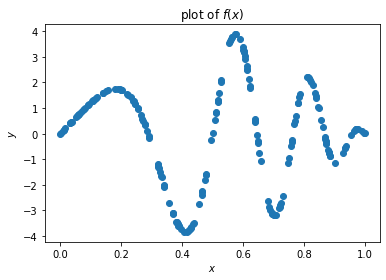

In [57]:
%matplotlib inline

d = 1
n = 200
X = torch.rand(n, d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

In [75]:
step_size = 0.05
n_epochs = 10000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
                               nn.Linear(d, n_hidden_1),
                               nn.Tanh(),
                               ##nn.ReLU(),
                               nn.Linear(n_hidden_1, n_hidden_2),
                               nn.Tanh(),
                               ## nn.ReLU(),
                               nn.Linear(n_hidden_2, d_out)
                              )

loss_func = nn.MSELoss()
optim = torch.optim.SGD(neural_network.parameters(), lr= step_size)
print('iter,\tloss')
for i in range(n_epochs):
  y_hat = neural_network(X)
  loss = loss_func(y_hat, y)
  optim.zero_grad()
  loss.backward()
  optim.step()

  if i % (n_epochs // 10) == 0:
    print('{},\t{:.2f}'.format(i, loss.item()))

iter,	loss
0,	4.04
1000,	2.79
2000,	1.30
3000,	0.43
4000,	0.23
5000,	0.14
6000,	0.08
7000,	0.05
8000,	0.03
9000,	0.02


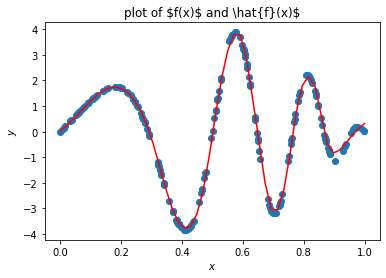

In [76]:
X_grid = torch.from_numpy(np.linspace(0, 1, 50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and \hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [78]:
step_size = 0.05
momentum = 0.9
n_epochs = 10000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
                               nn.Linear(d, n_hidden_1),
                               nn.Tanh(),
                               ##nn.ReLU(),
                               nn.Linear(n_hidden_1, n_hidden_2),
                               nn.Tanh(),
                               ## nn.ReLU(),
                               nn.Linear(n_hidden_2, d_out)
                              )

loss_func = nn.MSELoss()
optim = torch.optim.SGD(neural_network.parameters(), lr= step_size, momentum= momentum)
print('iter,\tloss')
for i in range(n_epochs):
  y_hat = neural_network(X)
  loss = loss_func(y_hat, y)
  optim.zero_grad()
  loss.backward()
  optim.step()

  if i % (n_epochs // 10) == 0:
    print('{},\t{:.2f}'.format(i, loss.item()))

iter,	loss
0,	4.09
1000,	0.01
2000,	0.00
3000,	0.00
4000,	0.00
5000,	0.00
6000,	0.01
7000,	0.00
8000,	0.00
9000,	0.00


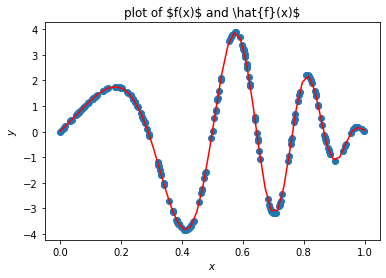

In [79]:
X_grid = torch.from_numpy(np.linspace(0, 1, 50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and \hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [81]:
loss = nn.CrossEntropyLoss()

input = torch.tensor([[-1., 1], [-1, 1], [1, -1]])

target = torch.tensor([1, 1, 0])
output = loss(input, target)
print(output)

tensor(0.1269)


In [82]:
# an entire mnist digit
image = np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3803922 , 0.37647063, 0.3019608 ,0.46274513, 0.2392157 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3529412 , 0.5411765 , 0.9215687 ,0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 ,0.9843138 , 0.9843138 , 0.9725491 , 0.9960785 , 0.9607844 ,0.9215687 , 0.74509805, 0.08235294, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.54901963,0.9843138 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.7411765 , 0.09019608, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8862746 , 0.9960785 , 0.81568635,0.7803922 , 0.7803922 , 0.7803922 , 0.7803922 , 0.54509807,0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 ,0.5019608 , 0.8705883 , 0.9960785 , 0.9960785 , 0.7411765 ,0.08235294, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.14901961, 0.32156864, 0.0509804 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.13333334,0.8352942 , 0.9960785 , 0.9960785 , 0.45098042, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.32941177, 0.9960785 ,0.9960785 , 0.9176471 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.32941177, 0.9960785 , 0.9960785 , 0.9176471 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.4156863 , 0.6156863 ,0.9960785 , 0.9960785 , 0.95294124, 0.20000002, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.09803922, 0.45882356, 0.8941177 , 0.8941177 ,0.8941177 , 0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.94117653, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.26666668, 0.4666667 , 0.86274517,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.5568628 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.14509805, 0.73333335,0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 , 0.8745099 ,0.8078432 , 0.8078432 , 0.29411766, 0.26666668, 0.8431373 ,0.9960785 , 0.9960785 , 0.45882356, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.4431373 , 0.8588236 , 0.9960785 , 0.9490197 , 0.89019614,0.45098042, 0.34901962, 0.12156864, 0., 0.,0., 0., 0.7843138 , 0.9960785 , 0.9450981 ,0.16078432, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.6627451 , 0.9960785 ,0.6901961 , 0.24313727, 0., 0., 0.,0., 0., 0., 0., 0.18823531,0.9058824 , 0.9960785 , 0.9176471 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.07058824, 0.48627454, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.32941177, 0.9960785 , 0.9960785 ,0.6509804 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.54509807, 0.9960785 , 0.9333334 , 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8235295 , 0.9803922 , 0.9960785 ,0.65882355, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.9490197 , 0.9960785 , 0.93725497, 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.34901962, 0.9843138 , 0.9450981 ,0.3372549 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.01960784,0.8078432 , 0.96470594, 0.6156863 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.01568628, 0.45882356, 0.27058825,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.], dtype=np.float32)
image_torch = torch.from_numpy(image).view(1, 1, 28, 28)

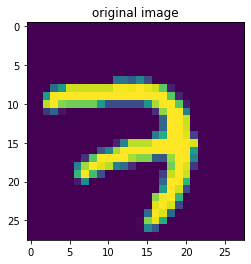

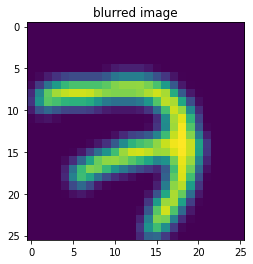

In [84]:
gaussian_kernel = torch.tensor([[1., 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0

conv = nn.Conv2d(1, 1, 3)
conv.weight.data[:] = gaussian_kernel
convolved  = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28, 28).detach().numpy())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show()

In [92]:
from torch.utils.data import Dataset, DataLoader

class FakeDataset(Dataset):

  def __init__(self, x, y):
    self.x = x
    self.y = y
    
  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [95]:
x = np.random.rand(100, 10)
y = np.random.rand(100)

dataset = FakeDataset(x, y)
dataloader = DataLoader(dataset, batch_size= 4, shuffle= True)

for i_batch, sample_batched in  enumerate(dataloader):
  print(i_batch, sample_batched)

0 [tensor([[0.3563, 0.8477, 0.6906, 0.7786, 0.1543, 0.5570, 0.1568, 0.7888, 0.7032,
         0.9995],
        [0.2983, 0.7530, 0.5459, 0.9038, 0.8004, 0.4731, 0.5922, 0.1066, 0.6251,
         0.2572],
        [0.4955, 0.6546, 0.2211, 0.0935, 0.5925, 0.1848, 0.4791, 0.8456, 0.5863,
         0.9677],
        [0.5175, 0.1231, 0.9716, 0.1054, 0.7225, 0.2727, 0.5424, 0.5820, 0.9168,
         0.9685]], dtype=torch.float64), tensor([0.9168, 0.3436, 0.3390, 0.6538], dtype=torch.float64)]
1 [tensor([[0.3061, 0.4995, 0.4466, 0.6483, 0.6811, 0.6943, 0.0213, 0.6019, 0.1641,
         0.1895],
        [0.0519, 0.3649, 0.4054, 0.1570, 0.4746, 0.0968, 0.9502, 0.1524, 0.5967,
         0.6234],
        [0.3252, 0.2952, 0.6860, 0.6462, 0.2103, 0.2481, 0.6707, 0.2387, 0.2590,
         0.1997],
        [0.2520, 0.8113, 0.8409, 0.4640, 0.7734, 0.9701, 0.3035, 0.5963, 0.2356,
         0.2924]], dtype=torch.float64), tensor([0.9114, 0.1352, 0.7997, 0.6425], dtype=torch.float64)]
2 [tensor([[0.7213, 0.0725, 0.

In [96]:
from apex import amp

model = torch.nn.Linear(10, 100).cuda()
optimizer = torch.optim.SGD(model.parameters(), lr= 1e-3)

model, optimizer = amp.initialize(model, optimizer, opt_level= '01')

with amp.scale_loss(loss, optimizer) as scaled_loss:
  scaled_loss.backward()

ModuleNotFoundError: ignored